In [461]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [462]:
# import data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [463]:
train

,Unnamed: 0,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,NaN,0.1691,652.10,29579.74,10.66,730,3333,4955.0,39.6,4,2,0,1
1,1,major_purchase,0.1354,191.27,52808.95,13.06,707,6063,12335.0,37.8,2,1,0,0
2,2,credit_card,0.0758,377.00,168689.22,11.98,736,2681,1505.0,5.0,1,0,0,0
3,3,debt_consolidation,0.1774,359.33,71325.19,20.55,702,3972,39536.0,94.1,1,0,0,0
4,4,credit_card,0.1430,875.45,130773.88,17.61,688,5555,17295.0,56.4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40780,40780,all_other,0.0981,154.87,51301.87,12.25,713,3421,5515.0,39.4,1,0,0,0
40781,40781,small_business,0.1159,493.19,45777.85,6.34,710,2992,256.0,7.0,1,0,0,0
40782,40782,credit_card,0.1485,377.59,51056.78,22.51,666,4094,22574.0,62.4,1,0,0,0
40783,40783,debt_consolidation,0.1422,365.85,24586.31,19.94,650,2532,832.0,5.6,0,0,0,0


In [464]:
test

,Unnamed: 0,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,40785,debt_consolidation,0.1543,225.68,16525.86,22.39,668,1960,43771.0,59.3,3,0,0
1,40786,debt_consolidation,0.1539,200.43,62412.73,21.84,660,5958,13607.0,87.0,1,1,0
2,40787,debt_consolidation,0.1503,252.35,42836.79,21.77,663,4950,1832.0,36.8,5,0,1
3,40788,debt_consolidation,0.1316,533.85,27821.44,10.60,690,1825,3597.0,60.0,0,0,0
4,40789,debt_consolidation,0.1506,484.50,91406.09,17.35,658,3253,12137.0,48.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40781,81566,home_improvement,0.1592,912.78,204278.05,12.73,761,7554,5823.0,30.9,8,0,0
40782,81567,all_other,0.1039,105.07,26707.34,19.99,734,10250,14821.0,51.9,2,0,0
40783,81568,debt_consolidation,0.1170,680.57,86555.61,16.55,741,4515,15540.0,46.6,0,0,0
40784,81569,debt_consolidation,0.1286,368.30,73806.47,15.91,681,2315,38974.0,77.0,0,1,0


In [465]:
# describe train

train = train.iloc[:,1:]
train.describe()

,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,40785.000000,40779.000000,4.078500e+04,40785.000000,40785.000000,40785.000000,40784.000000,40773.000000,40785.000000,40785.000000,40785.000000,40785.000000
mean,0.125414,302.329408,7.087001e+04,12.530579,709.393061,4736.481746,15426.217953,46.170792,1.543018,0.180998,0.039696,0.151870
std,0.030167,208.068861,6.524275e+04,6.831929,39.299297,2568.216636,22343.735674,28.257963,2.059082,0.513544,0.195246,0.358899
min,0.060800,15.680000,2.086720e+03,0.110000,615.000000,179.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,0.105300,157.400000,3.868640e+04,6.700000,679.000000,2965.000000,3433.000000,22.600000,0.000000,0.000000,0.000000,0.000000
50%,0.125200,241.140000,5.862029e+04,12.740000,703.000000,4304.000000,8441.000000,44.500000,1.000000,0.000000,0.000000,0.000000
75%,0.145100,391.995000,8.416863e+04,17.930000,737.000000,5896.000000,19085.500000,68.900000,2.000000,0.000000,0.000000,0.000000
max,0.800000,939.380000,1.913363e+06,29.930000,826.000000,16888.000000,356328.000000,108.300000,14.000000,3.000000,1.000000,1.000000


In [466]:
# describe test

test = test.iloc[:,1:]
test.describe()

,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,40786.00000,40782.000000,4.078600e+04,40786.000000,40786.000000,40786.000000,40780.000000,40769.000000,40786.00000,40786.000000,40786.000000
mean,0.12544,300.582001,7.019006e+04,12.552485,709.242338,4685.578556,15249.915571,46.423736,1.52876,0.179694,0.038739
std,0.03087,208.178433,6.145846e+04,6.836684,39.320390,2540.021093,22273.623474,28.320324,2.08263,0.513398,0.192974
min,0.06160,15.680000,2.128340e+03,0.090000,616.000000,181.000000,1.000000,0.100000,0.00000,0.000000,0.000000
25%,0.10540,155.790000,3.855412e+04,6.700000,679.000000,2928.250000,3367.000000,23.000000,0.00000,0.000000,0.000000
50%,0.12510,240.410000,5.814888e+04,12.760000,704.000000,4253.000000,8258.000000,44.700000,1.00000,0.000000,0.000000
75%,0.14510,388.420000,8.379708e+04,17.950000,736.750000,5834.000000,18688.250000,69.100000,2.00000,0.000000,0.000000
max,0.90000,938.860000,2.000790e+06,29.950000,826.000000,17416.000000,296156.000000,109.600000,14.00000,3.000000,1.000000


In [467]:
# check train

train.isna().sum()[train.isna().sum()>0]

purpose        773
installment      6
revol.bal        1
revol.util      12
dtype: int64

In [468]:
# check test

test.isna().sum()[test.isna().sum()>0]

purpose        504
installment      4
revol.bal        6
revol.util      17
dtype: int64

In [469]:
# process missing value

train['purpose'] = train['purpose'].fillna('all_other')
test['purpose'] = test['purpose'].fillna('all_other')

train['installment'] = train['installment'].fillna(train['installment'].mean())
test['installment'] = test['installment'].fillna(test['installment'].mean())

train['revol.bal'] = train['revol.bal'].fillna(train['revol.bal'].mean())
test['revol.bal'] = test['revol.bal'].fillna(test['revol.bal'].mean())

train['revol.util'] = train['revol.util'].fillna(train['revol.util'].mean())
test['revol.util'] = test['revol.util'].fillna(test['revol.util'].mean())

In [470]:
# check train

train.isna().sum()

purpose              0
int.rate             0
installment          0
annual.inc           0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [471]:
# check test

test.isna().sum()

purpose              0
int.rate             0
installment          0
annual.inc           0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
dtype: int64

In [472]:
train

,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,all_other,0.1691,652.10,29579.74,10.66,730,3333,4955.0,39.6,4,2,0,1
1,major_purchase,0.1354,191.27,52808.95,13.06,707,6063,12335.0,37.8,2,1,0,0
2,credit_card,0.0758,377.00,168689.22,11.98,736,2681,1505.0,5.0,1,0,0,0
3,debt_consolidation,0.1774,359.33,71325.19,20.55,702,3972,39536.0,94.1,1,0,0,0
4,credit_card,0.1430,875.45,130773.88,17.61,688,5555,17295.0,56.4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40780,all_other,0.0981,154.87,51301.87,12.25,713,3421,5515.0,39.4,1,0,0,0
40781,small_business,0.1159,493.19,45777.85,6.34,710,2992,256.0,7.0,1,0,0,0
40782,credit_card,0.1485,377.59,51056.78,22.51,666,4094,22574.0,62.4,1,0,0,0
40783,debt_consolidation,0.1422,365.85,24586.31,19.94,650,2532,832.0,5.6,0,0,0,0


In [473]:
test

,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,debt_consolidation,0.1543,225.68,16525.86,22.39,668,1960,43771.0,59.3,3,0,0
1,debt_consolidation,0.1539,200.43,62412.73,21.84,660,5958,13607.0,87.0,1,1,0
2,debt_consolidation,0.1503,252.35,42836.79,21.77,663,4950,1832.0,36.8,5,0,1
3,debt_consolidation,0.1316,533.85,27821.44,10.60,690,1825,3597.0,60.0,0,0,0
4,debt_consolidation,0.1506,484.50,91406.09,17.35,658,3253,12137.0,48.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40781,home_improvement,0.1592,912.78,204278.05,12.73,761,7554,5823.0,30.9,8,0,0
40782,all_other,0.1039,105.07,26707.34,19.99,734,10250,14821.0,51.9,2,0,0
40783,debt_consolidation,0.1170,680.57,86555.61,16.55,741,4515,15540.0,46.6,0,0,0
40784,debt_consolidation,0.1286,368.30,73806.47,15.91,681,2315,38974.0,77.0,0,1,0


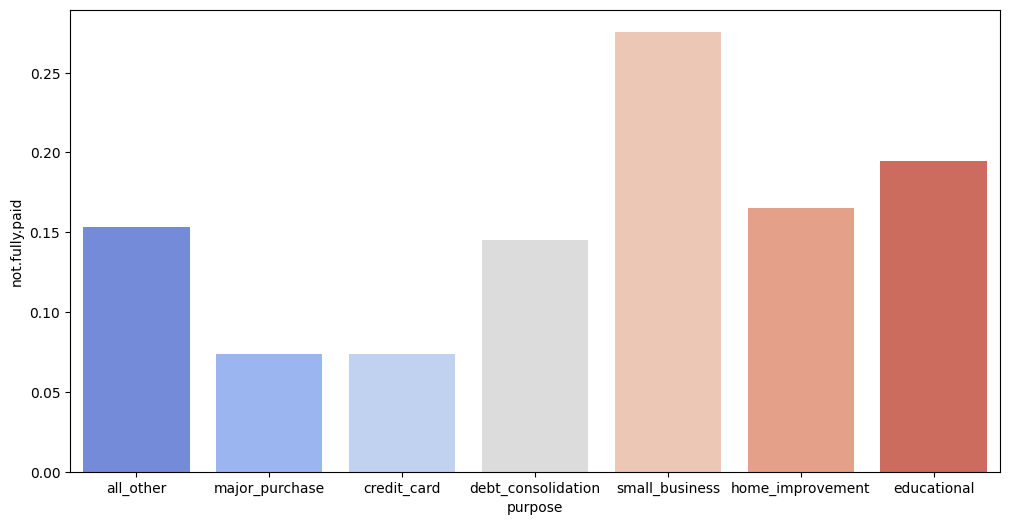

In [474]:
# purpose

plt.figure(figsize=(12,6))
sns.barplot(x='purpose', y='not.fully.paid', data=train, palette='coolwarm', ci=None)

train = pd.get_dummies(train, columns=['purpose'])
train = train.astype(float)

test = pd.get_dummies(test, columns=['purpose'])
test = test.astype(float)

In [475]:
# data visualization

#plt.figure(figsize=(15, 20))

#for i, col in enumerate(train.columns):
    #plt.subplot(10, 5, i + 1)
    #sns.histplot(train[col], color="blue", label='Train', kde=True, stat="density", linewidth=0, alpha=0.6)
    #if col in test.columns: 
    #    sns.histplot(test[col], color="red", label='Test', kde=True, stat="density", linewidth=0, alpha=0.6)
    #plt.title(col)
    #plt.legend()
    #plt.tight_layout()

#plt.show()

In [476]:
train

,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1691,652.10,29579.74,10.66,730.0,3333.0,4955.0,39.6,4.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1354,191.27,52808.95,13.06,707.0,6063.0,12335.0,37.8,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0758,377.00,168689.22,11.98,736.0,2681.0,1505.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.1774,359.33,71325.19,20.55,702.0,3972.0,39536.0,94.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.1430,875.45,130773.88,17.61,688.0,5555.0,17295.0,56.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40780,0.0981,154.87,51301.87,12.25,713.0,3421.0,5515.0,39.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40781,0.1159,493.19,45777.85,6.34,710.0,2992.0,256.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40782,0.1485,377.59,51056.78,22.51,666.0,4094.0,22574.0,62.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40783,0.1422,365.85,24586.31,19.94,650.0,2532.0,832.0,5.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [477]:
train.describe()

,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,40785.000000,40785.000000,4.078500e+04,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000,40785.000000
mean,0.125414,302.329408,7.087001e+04,12.530579,709.393061,4736.481746,15426.217953,46.170792,1.543018,0.180998,0.039696,0.151870,0.169866,0.165992,0.188452,0.111168,0.127032,0.108030,0.129459
std,0.030167,208.053555,6.524275e+04,6.831929,39.299297,2568.216636,22343.461745,28.253806,2.059082,0.513544,0.195246,0.358899,0.375520,0.372078,0.391077,0.314344,0.333013,0.310422,0.335712
min,0.060800,15.680000,2.086720e+03,0.110000,615.000000,179.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.105300,157.430000,3.868640e+04,6.700000,679.000000,2965.000000,3433.000000,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.125200,241.190000,5.862029e+04,12.740000,703.000000,4304.000000,8441.000000,44.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.145100,391.990000,8.416863e+04,17.930000,737.000000,5896.000000,19085.000000,68.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.800000,939.380000,1.913363e+06,29.930000,826.000000,16888.000000,356328.000000,108.300000,14.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


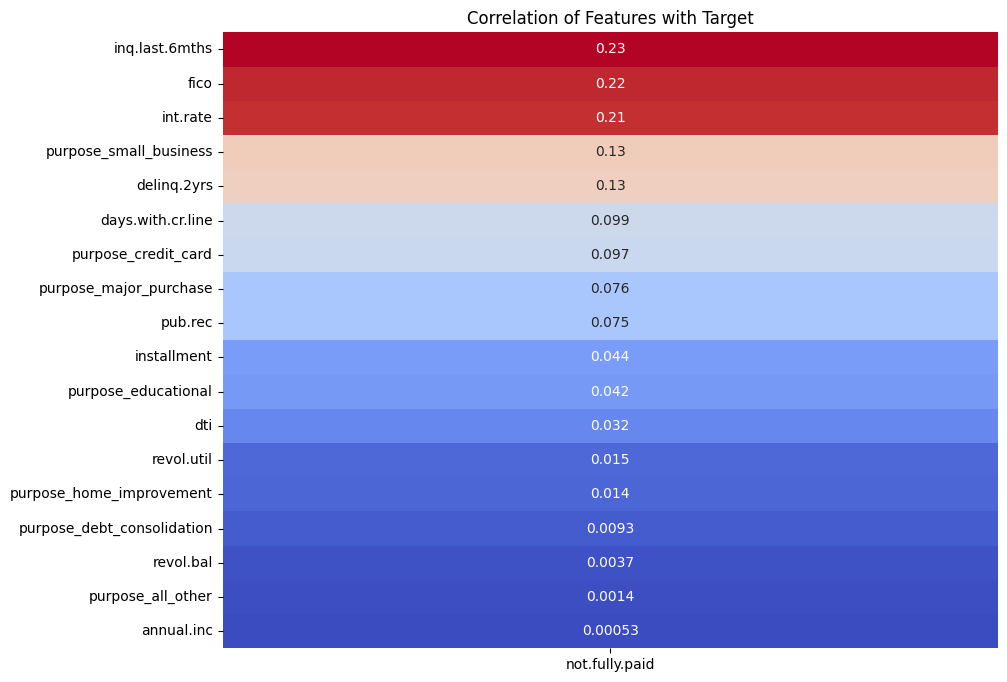

In [478]:
# heat map

correlation_with_target = train.corr()['not.fully.paid'].drop('not.fully.paid')
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation of Features with Target')
plt.show()

In [479]:
train.columns

Index(['int.rate', 'installment', 'annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'not.fully.paid', 'purpose_all_other',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [480]:
test.columns

Index(['int.rate', 'installment', 'annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [481]:
# create feature

train['installment_annual_inc_interaction'] = train['installment'] * train['annual.inc']
test['installment_annual_inc_interaction'] = test['installment'] * test['annual.inc']

#train['fico_revol_util_interaction'] = train['fico'] * train['revol.util']
#test['fico_revol_util_interaction'] = test['fico'] * test['revol.util']

#train['log_int_rate'] = np.log1p(train['int.rate'])
#test['log_int_rate'] = np.log1p(test['int.rate'])

In [482]:
# preprocess

features = ['int.rate', 'installment', 'annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec',  'purpose_all_other',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'
       ]
target = ['not.fully.paid']

features.append('installment_annual_inc_interaction')
#features.append('fico_revol_util_interaction')
#features.append('log_int_rate')

scaler = StandardScaler()

train_features = train[features]
train_target = train[target]
train_features_scaled = scaler.fit_transform(train[features])

test_features = test[features]
test_features_scaled = scaler.transform(test[features])

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['not.fully.paid'] = train_target.values
test_scaled = pd.DataFrame(test_features_scaled, columns=test_features.columns)

train_scaled_path = 'train_scaled.csv'
test_scaled_path = 'test_scaled.csv'
train_scaled.to_csv(train_scaled_path, index=False)
test_scaled.to_csv(test_scaled_path, index=False)
print('File saved.')

File saved.
